<a href="https://colab.research.google.com/github/mzkhan2000/KG-Embeddings/blob/main/Embedding_visualization_Monir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade gensim

     |████████████████████████████████| 23.9MB 126kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
# Moniruzzaman
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

In [4]:
import numpy
import multiprocessing
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls "/content/drive/My Drive/MonirResearchDatasets"

freebase-vectors-skipgram1000-en.bin
Glove-6B
google_benchmark_data_embeddings_evaluation
google_benchmark_data_embeddings_evaluation_update
GoogleNews-vectors-negative300.bin
google-question-words.txt


In [8]:
!ls "/content/drive/My Drive/MonirResearchDatasets/google_benchmark_data_embeddings_evaluation"

capital-common-countries.txt   gram3-comparative.txt
capital-world.txt	       gram4-superlative.txt
city-in-state.txt	       gram5-present-participle.txt
currency.txt		       gram6-nationality-adjective.txt
family2.txt		       gram7-past-tense.txt
family.txt		       gram8-plural.txt
gram1-adjective-to-adverb.txt  gram9-plural-verbs.txt
gram2-opposite.txt


In [9]:
GoogleNews = "/content/drive/My Drive/MonirResearchDatasets/GoogleNews-vectors-negative300.bin"

In [ ]:
Model_accuracy_file = "/content/drive/My Drive/MonirResearchDatasets/google-question-words.txt"

In [ ]:
Model_accuracy_file_family = "/content/drive/My Drive/MonirResearchDatasets/google_benchmark_data_embeddings_evaluation_update/family.txt"

In [10]:
GoogleNews_model = KeyedVectors.load_word2vec_format(GoogleNews, binary=True)

In [11]:

keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in GoogleNews_model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(GoogleNews_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [14]:
#import TSNE
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

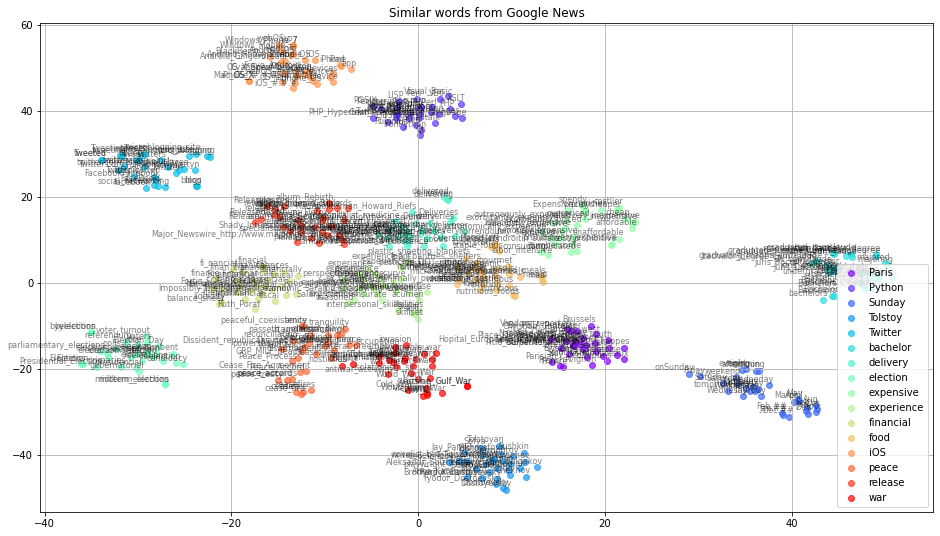

In [15]:
# Script for creating a 2D scatter plot using Matplotlib library for data visualization in Python.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
file_glove_6B = '/content/drive/My Drive/MonirResearchDatasets/Glove-6B/glove.6B.100d.txt.word2vec'
Glove_6B_model = KeyedVectors.load_word2vec_format(file_glove_6B, binary=False)

In [ ]:
GoogleNews_model_test = Word2Vec(corpus_file= Model_accuracy_file)

In [ ]:
Glove_6B_model.evaluate_word_analogies(Model_accuracy_file_family)

(0.8162055335968379,
 [{'correct': [('BOY', 'GIRL', 'BROTHERS', 'SISTERS'),
    ('BOY', 'GIRL', 'DAD', 'MOM'),
    ('BOY', 'GIRL', 'FATHER', 'MOTHER'),
    ('BOY', 'GIRL', 'GRANDFATHER', 'GRANDMOTHER'),
    ('BOY', 'GIRL', 'GRANDPA', 'GRANDMA'),
    ('BOY', 'GIRL', 'GRANDSON', 'GRANDDAUGHTER'),
    ('BOY', 'GIRL', 'GROOM', 'BRIDE'),
    ('BOY', 'GIRL', 'HE', 'SHE'),
    ('BOY', 'GIRL', 'HIS', 'HER'),
    ('BOY', 'GIRL', 'HUSBAND', 'WIFE'),
    ('BOY', 'GIRL', 'KING', 'QUEEN'),
    ('BOY', 'GIRL', 'MAN', 'WOMAN'),
    ('BOY', 'GIRL', 'NEPHEW', 'NIECE'),
    ('BOY', 'GIRL', 'PRINCE', 'PRINCESS'),
    ('BOY', 'GIRL', 'SON', 'DAUGHTER'),
    ('BOY', 'GIRL', 'SONS', 'DAUGHTERS'),
    ('BOY', 'GIRL', 'STEPBROTHER', 'STEPSISTER'),
    ('BOY', 'GIRL', 'STEPFATHER', 'STEPMOTHER'),
    ('BOY', 'GIRL', 'STEPSON', 'STEPDAUGHTER'),
    ('BOY', 'GIRL', 'UNCLE', 'AUNT'),
    ('BROTHER', 'SISTER', 'BROTHERS', 'SISTERS'),
    ('BROTHER', 'SISTER', 'DAD', 'MOM'),
    ('BROTHER', 'SISTER', 'FATHER', 'MOT

In [ ]:
GoogleNews_model.evaluate_word_analogies(Model_accuracy_file_family)

(0.8616600790513834,
 [{'correct': [('BOY', 'GIRL', 'BROTHER', 'SISTER'),
    ('BOY', 'GIRL', 'BROTHERS', 'SISTERS'),
    ('BOY', 'GIRL', 'DAD', 'MOM'),
    ('BOY', 'GIRL', 'FATHER', 'MOTHER'),
    ('BOY', 'GIRL', 'GRANDFATHER', 'GRANDMOTHER'),
    ('BOY', 'GIRL', 'GRANDPA', 'GRANDMA'),
    ('BOY', 'GIRL', 'GRANDSON', 'GRANDDAUGHTER'),
    ('BOY', 'GIRL', 'GROOM', 'BRIDE'),
    ('BOY', 'GIRL', 'HE', 'SHE'),
    ('BOY', 'GIRL', 'HIS', 'HER'),
    ('BOY', 'GIRL', 'HUSBAND', 'WIFE'),
    ('BOY', 'GIRL', 'KING', 'QUEEN'),
    ('BOY', 'GIRL', 'MAN', 'WOMAN'),
    ('BOY', 'GIRL', 'NEPHEW', 'NIECE'),
    ('BOY', 'GIRL', 'POLICEMAN', 'POLICEWOMAN'),
    ('BOY', 'GIRL', 'PRINCE', 'PRINCESS'),
    ('BOY', 'GIRL', 'SON', 'DAUGHTER'),
    ('BOY', 'GIRL', 'SONS', 'DAUGHTERS'),
    ('BOY', 'GIRL', 'STEPSON', 'STEPDAUGHTER'),
    ('BOY', 'GIRL', 'UNCLE', 'AUNT'),
    ('BROTHER', 'SISTER', 'BROTHERS', 'SISTERS'),
    ('BROTHER', 'SISTER', 'DAD', 'MOM'),
    ('BROTHER', 'SISTER', 'FATHER', 'MOTHER'),
 

In [ ]:
GoogleNews_model.evaluate_word_analogies(Model_accuracy_file)

(0.7401448525607863,
 [{'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
    ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
    ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
    ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
    ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
    ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
    ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
    ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
    ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
    ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
    ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
    ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
    ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
    ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
    ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
    ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
    ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
    ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
    ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'),
    ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'),
    ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERM

In [ ]:
GoogleNews_model.eva

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '/content/drive/My Drive/MonirResearchDatasets/Glove-6B/glove.6B.100d.txt'
word2vec_output_file = '/content/drive/My Drive/MonirResearchDatasets/Glove-6B/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
file_glove_6B = '/content/drive/My Drive/MonirResearchDatasets/Glove-6B/glove.6B.100d.txt.word2vec'
Glove_6B_model = KeyedVectors.load_word2vec_format(file_glove_6B, binary=False)

In [ ]:
gravity10_Glove_6B_model = Glove_6B_model.most_similar('gravity', topn=20)
print(gravity10_Glove_6B_model)

[('gravitational', 0.7087547183036804), ('quantum', 0.682186484336853), ('cosmic', 0.6506437659263611), ('earth', 0.6482942700386047), ('measurements', 0.6432933807373047), ('particle', 0.6299072504043579), ('velocity', 0.6290275454521179), ('magnetic', 0.6241236925125122), ('theory', 0.6203150749206543), ('surface', 0.5997207760810852), ('phenomena', 0.5739166736602783), ('dimensions', 0.5736842751502991), ('electromagnetic', 0.5720373392105103), ('atmospheric', 0.5717574954032898), ('measurement', 0.56778883934021), ('particles', 0.5657782554626465), ('newtonian', 0.5604618787765503), ('flow', 0.554766833782196), ('speed', 0.5539568066596985), ('temperature', 0.5512298941612244)]
